# 2.c.   Both JSON and Parquet datasets are identical in contents, but you must choose to use one over the other. Please provide your justification for your choice of dataset...?

#### 1.Parquet is faster then json, json is normally used for configurations setting,but Parquet is columnar dataset formot which is more faster when ever reading.
#### 2 In google cloud, database called big query is a columnar database which works more faster with Parquet data


# importing required library

In [51]:
import pandas as pd
import numpy as np
import json
import requests
import geocoder
from matplotlib import pyplot as plt
import seaborn as sns
import glob, os, json
from geopy.geocoders import Nominatim
import goslate
geolocator = Nominatim(user_agent="geoapiExercises")
import ast
from pandas.io.json import json_normalize
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm.auto import tqdm
tqdm.pandas()
import pinyin

# Reading all the json file inside the dowload folder

In [3]:
def read_json(json_dir):
    json_pattern = os.path.join(json_dir, '*.json')
    file_list = glob.glob(json_pattern)

    dfs = []
    for file in file_list[:2]:
        print(file)
        json_data = pd.read_json(file,lines=True)
        dfs.append(json_data)
    df = pd.concat(dfs)
    
    return df
    

In [4]:
#df=read_json('json')

## reading the all the csv file having all the json data.

In [164]:
df=pd.read_csv("Ocean AIS dwell behavior.csv")

## preprocesseing data

In [165]:
def preprocess(df):
    try:
        df["epochMillis"] = pd.to_datetime(df["epochMillis"],unit='ms')
    
        df["epochMillis"] = pd.to_datetime(df["epochMillis"],unit='ms')
        v = json_normalize([ast.literal_eval(j) for j in df.pop("position")], sep='')
        df=pd.concat([df, v], 1)
        
        
        
        v = json_normalize([ast.literal_eval(j) for j in df.pop("navigation")], sep='')
        df=pd.concat([df, v], 1)
        
        
        
        v = json_normalize([ast.literal_eval(j) for j in df.pop("vesselDetails")], sep='')
        v=v.rename(columns={"name":"vessel_name"})
        df=pd.concat([df, v], 1)
        
        
        v = json_normalize([ast.literal_eval(j) for j in df.pop("port")], sep='')
        v=v.rename(columns={"name":"port_name",'latitude':"port_latitude","longitude":"port_longitude"})
        df=pd.concat([df, v], 1)
    except exception as e:
        print(e)
        
    return df

In [166]:
df = preprocess(df)

<ipython-input-165-8eef9a2ed5a0>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  v = json_normalize([ast.literal_eval(j) for j in df.pop("position")], sep='')
<ipython-input-165-8eef9a2ed5a0>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  v = json_normalize([ast.literal_eval(j) for j in df.pop("navigation")], sep='')
<ipython-input-165-8eef9a2ed5a0>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  v = json_normalize([ast.literal_eval(j) for j in df.pop("vesselDetails")], sep='')
<ipython-input-165-8eef9a2ed5a0>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  v = json_normalize([ast.literal_eval(j) for j in df.pop("port")], sep='')


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473877 entries, 0 to 3473876
Data columns (total 28 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   epochMillis       datetime64[ns]
 2   mmsi              int64         
 3   olson_timezone    object        
 4   imo               float64       
 5   callSign          object        
 6   destination       object        
 7   cargoDetails      object        
 8   latitude          float64       
 9   longitude         float64       
 10  navCode           int64         
 11  navDesc           object        
 12  courseOverGround  float64       
 13  heading           float64       
 14  rateOfTurn        float64       
 15  speedOverGround   float64       
 16  vessel_name       object        
 17  typeName          object        
 18  typeCode          int64         
 19  draught           float64       
 20  length            float64       
 21  width   

# read preprocessed data

In [52]:
df=pd.read_csv("preprocessed_data.csv")
df["epochMillis"] = pd.to_datetime(df["epochMillis"])

## 5.What region(s) of the world and ocean port(s) does this data represent? Provide evidence to justify your answer.

#### below table gives city of the position od the vessel having the flagcountry as inda


In [54]:
df_india=df[df["flagCountry"]=='India'].reset_index()
df_india['city']=np.nan
for i in range (0,len(df_india['latitude'])):
    try:
        location=geolocator.reverse(str(df_india['latitude'][i])+","+str(df_india['longitude'][i]))
        df_india['city'].iloc[i]=pinyin.get(location.raw.get('address').get('city'))
    except:
        pass
df_india

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# 3.What is(are) the main time period(s) in the data?


#### from the below plots, we can say that , main time period will be 3rd month(march) and the week 13 from compared week 12 and year 2019 is having more vessel involved the transportaion

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='values_count'>

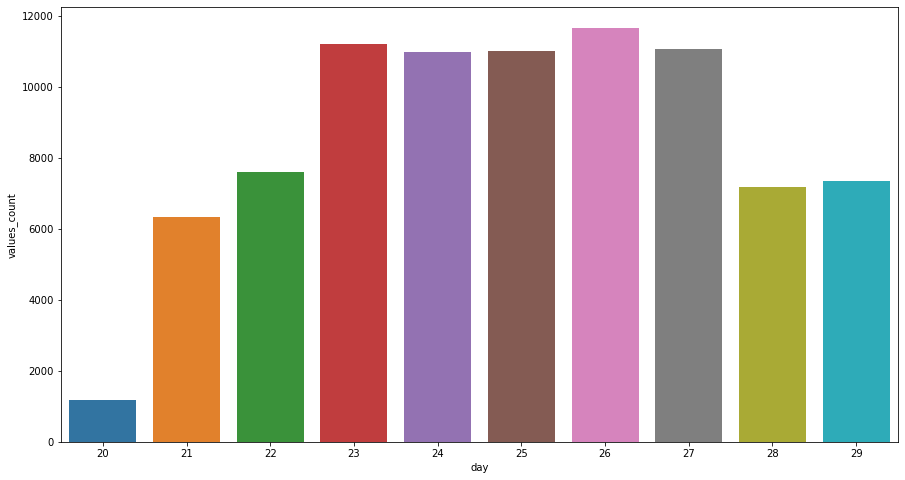

In [57]:
df["day"] = df["epochMillis"].dt.day
dd = df.groupby(["day"])["mmsi"].nunique().sort_values(ascending=False).reset_index().rename(columns={"mmsi":"values_count"})


plt.figure(figsize = [15,8])
sns.barplot("day","values_count",data = dd)

<ipython-input-58-61a8424dcdc6>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["week"] = df["epochMillis"].dt.week
/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='values_count'>

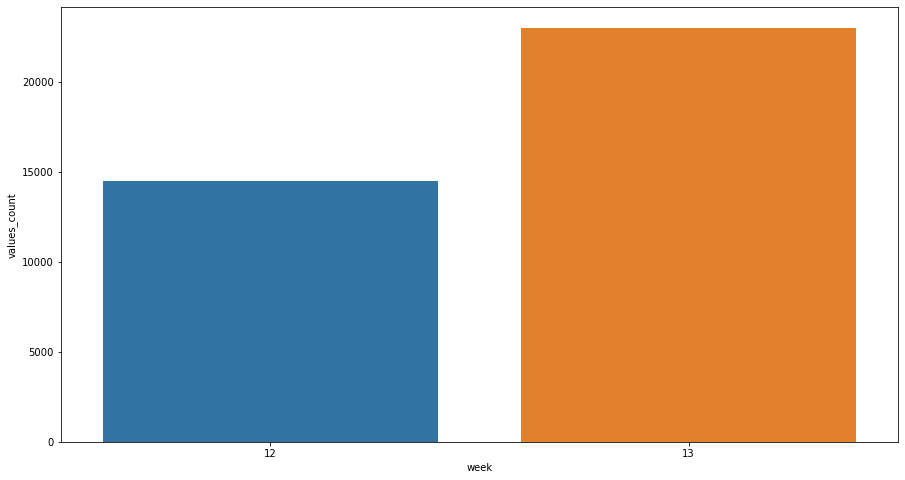

In [58]:
df["week"] = df["epochMillis"].dt.week
dd = df.groupby(["week"])["mmsi"].nunique().sort_values(ascending = False).reset_index().rename(columns = {"mmsi":"values_count"})


plt.figure(figsize =[15,8])
sns.barplot("week","values_count",data = dd)

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='values_count'>

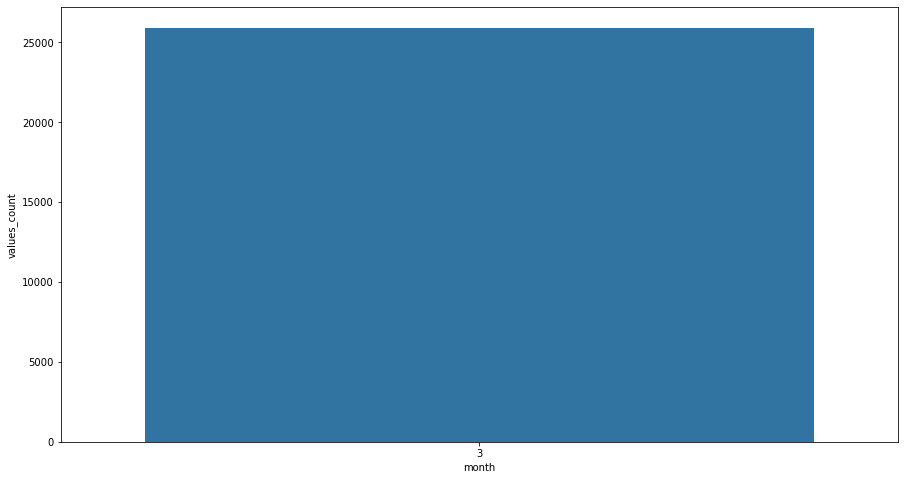

In [59]:
df["month"] = df["epochMillis"].dt.month
dd = df.groupby(["month"])["mmsi"].nunique().sort_values(ascending=False).reset_index().rename(columns={"mmsi":"values_count"})


plt.figure(figsize =[15,8])
sns.barplot("month","values_count",data  =dd)

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='values_count'>

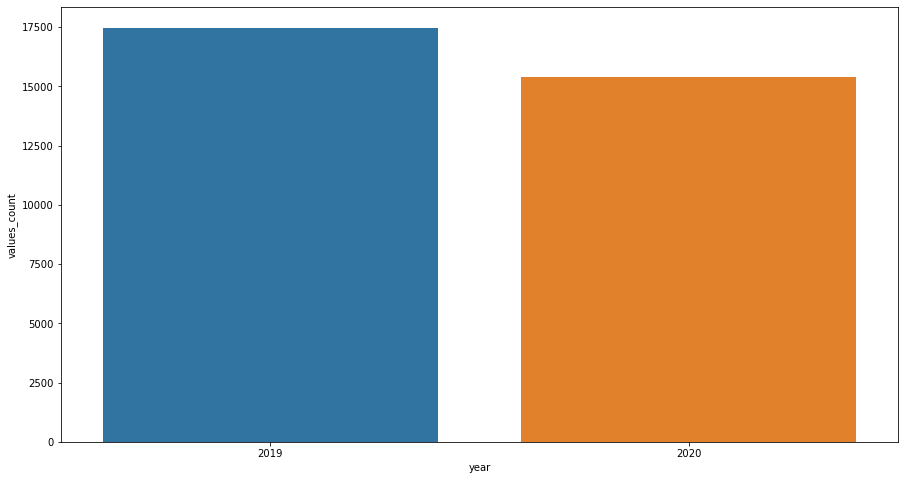

In [60]:
df["year"]= df["epochMillis"].dt.year

dd = df.groupby(["year"])["mmsi"].nunique().sort_values(ascending = False).reset_index().rename(columns =  {"mmsi":"values_count"})


plt.figure(figsize = [15,8])
sns.barplot("year","values_count",data = dd)

# 4.Which are the top three most sparse variables?
#### 1.what does sparesity means:
#### ans: we can tell the data spare in 2 ways , onw way is while checking raw data where we see the fature having lot Nan values and the other ways is while giving the data to the model model where the varibales  were having variations in the data.


## top 3 spare varibales were 

####  cargoDetails : 0.9040633850881882
####  imo : 0.4234289239371457
####  destination : 0.3272951229994614
####  callSign : 0.29131860454472047



In [147]:
f=[]
d=[]
def nullplot():
    for feature in df.columns:
        print(feature,":",df[feature].isna().sum()/df.shape[0])
        #sns.barplot(x=df[feature],y=df2[feature].isna().sum()/df2.shape[0])
        f.append(feature)
        d.append(df[feature].isna().sum()/df.shape[0])
    plt.figure(figsize=[15,5])
    sns.barplot(x=f,y=d)
    return

Unnamed: 0 : 0.0
Unnamed: 0.1 : 0.0
epochMillis : 0.0
mmsi : 0.0
olson_timezone : 0.0
imo : 0.4234289239371457
callSign : 0.29131860454472047
destination : 0.3272951229994614
cargoDetails : 0.9040633850881882
latitude : 0.0
longitude : 0.0
navCode : 0.0
navDesc : 0.0
courseOverGround : 0.0
heading : 0.0
rateOfTurn : 0.0
speedOverGround : 0.0
vessel_name : 0.0
typeName : 0.0
typeCode : 0.0
draught : 0.06172498335433293
length : 0.012146371330936587
width : 0.012146371330936587
flagCode : 0.0
flagCountry : 0.0
unlocode : 0.0
port_name : 0.0
port_latitude : 0.0
port_longitude : 0.0
day : 0.0
week : 0.0
month : 0.0
year : 0.0


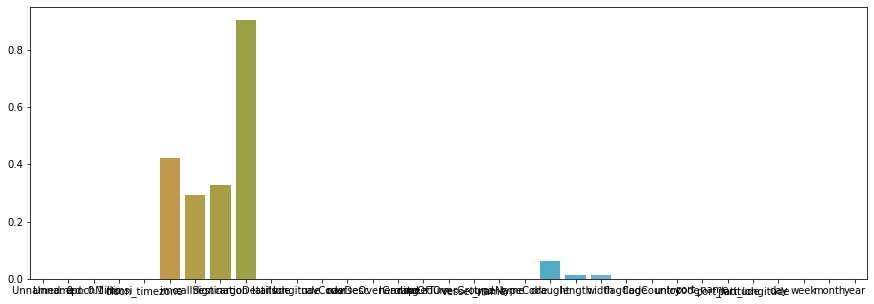

In [148]:
nullplot()

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetures', ylabel='counts'>

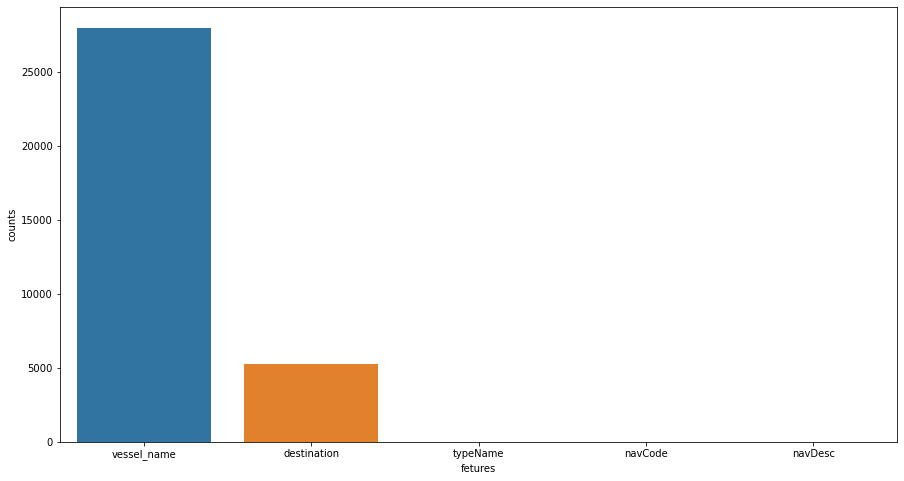

In [62]:
cat =["navCode","navDesc","port_name","typeName","unlocode","vessel_name","destination","olson_timezone"]

dd = df[cat].nunique().sort_values(ascending = False).reset_index()[:5].rename(columns = {'index':"fetures",0:"counts"})
plt.figure(figsize = [15,8])
sns.barplot("fetures","counts",data = dd)
    

# 6.frequency tabulation of the various Navigation Codes & Descriptions (i.e., navCode & NavDesc).

In [149]:
dd = df["navCode"].value_counts().sort_values(ascending = False).reset_index().rename(columns = {"index":"navCode","navCode":"values_count"})
dd

,navCode,values_count
0,16,1357985
1,0,1063676
2,5,554133
3,1,426433
4,15,29330
5,8,24889
6,3,8237
7,2,3471
8,4,1483
9,9,1359


In [150]:
dd = df["navDesc"].value_counts().sort_values(ascending = False).reset_index().rename(columns = {"index":"navDesc","navDesc":"values_count"})
dd

,navDesc,values_count
0,Unknown,1357985
1,Under Way Using Engine,1063676
2,Moored,554133
3,At Anchor,426433
4,Not Defined,29330
5,Underway Sailing,24889
6,Restricted Manoeuvrability,8237
7,Not Under Command,3471
8,Reserved For Future Use,2159
9,Constrained By Her Draught,1483


In [151]:
dd = df.groupby(["port_name"])["mmsi"].nunique().sort_values(ascending = False).reset_index()
dd

,port_name,mmsi
0,SHANGHAI PT,25927


In [153]:
dd = df.groupby(["mmsi"])["navCode"].nunique().sort_values(ascending = False).reset_index()
dd

,mmsi,navCode
0,538004601,5
1,432926000,5
2,477302900,5
3,413954961,5
4,636014203,5
...,...,...
25922,413360330,1
25923,413360320,1
25924,413360310,1
25925,413360290,1


# 7. For MMSI = 205792000

In [67]:
df_205792000 = df[df["mmsi"] == 205792000]  # filter the data belongs to MMSI 205792000

## 7 a.   Limit the data to only the TOP 5 Navigation Codes based from the response to question 6


/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='navCode', ylabel='counts'>

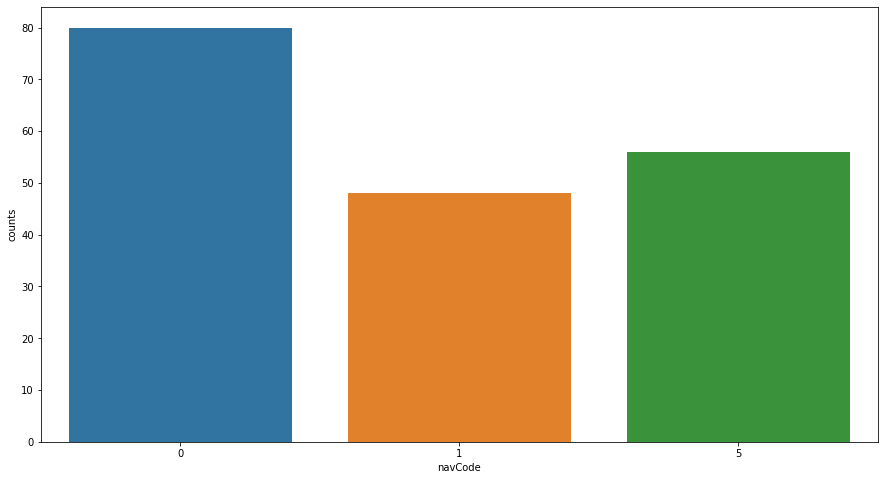

In [159]:
dd=df_205792000["navCode"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navCode","navCode":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navCode","counts",data=dd)

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='navDesc', ylabel='counts'>

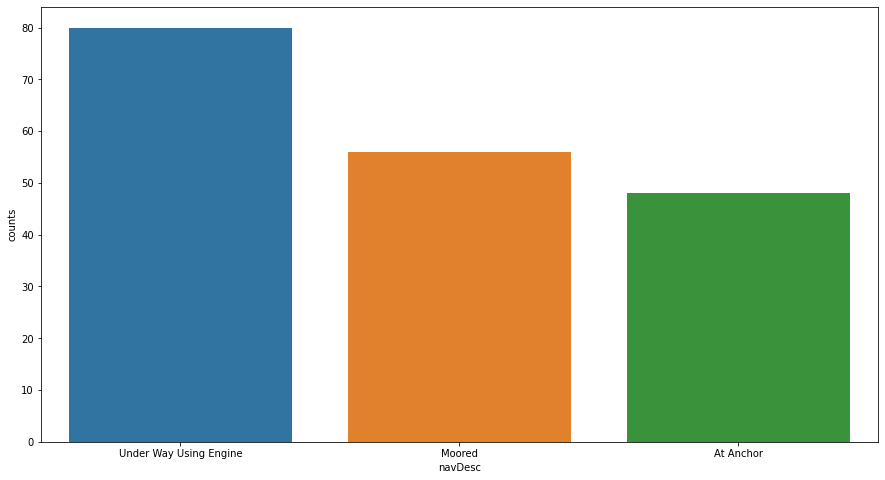

In [160]:
dd=df_205792000["navDesc"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navDesc","navDesc":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navDesc","counts",data=dd)

### 7.b.   Provide the final state for each series of contiguous events with the same Navigation Code; series may be interrupted by other series, but each contiguous series must be its own record.

In [71]:
df_205792000['city']=np.nan
for i in range (0,len(df_205792000['latitude'])):
    try:
        location=geolocator.reverse(str(df['latitude'][i])+","+str(df['longitude'][i]))
        df_205792000['city'].iloc[i]=pinyin.get(location.raw.get('address').get('city'))
    except:
        pass

<ipython-input-71-117ad7da42b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_205792000['city']=np.nan
/Users/varun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/varun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [155]:
df_205792000.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index().merge(df_205792000[["epochMillis","mmsi","navCode","navDesc","latitude","longitude","city"]],on=["mmsi","navCode",'epochMillis'],how="inner")



,mmsi,navCode,epochMillis,navDesc,latitude,longitude,city
0,205792000,0,2020-03-25 09:51:28,Under Way Using Engine,31.074333,122.77600,zhōushānshì
1,205792000,1,2020-03-23 21:49:31,At Anchor,31.264334,122.66950,zhōushānshì
2,205792000,5,2020-03-25 03:32:21,Moored,31.377500,121.57383,pǔdōngxīnqū


### 7.c.   Final report should include at least the following fields/columns:
### i.   mmsi = the MMSI of the vessel
### ii.   timestamp = the timestamp of the last event in that contiguous series
### iii.   Navigation Code = the navigation code (i.e., navigation.navCode)
### iv.   Navigation Description = the navigation code description (i.e., navigation.navDesc)
### v.   lead time (in Milliseconds) = the time difference in milliseconds between the last and first timestamp of that particular series of the same contiguous navigation codes


In [156]:
dff=df_205792000.groupby(["mmsi","navCode","navDesc"])["epochMillis"].max().reset_index().rename(columns={"epochMillis":"last_event"})
dff["lead_time_in_ms"]=np.nan

In [157]:
dff["lead_time_in_ms"]=df_205792000.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index()[["epochMillis"]]-df_205792000.groupby(["mmsi","navCode"])["epochMillis"].min().reset_index()[["epochMillis"]]

In [158]:
dff

,mmsi,navCode,navDesc,last_event,lead_time_in_ms
0,205792000,0,Under Way Using Engine,2020-03-25 09:51:28,1 days 11:42:08
1,205792000,1,At Anchor,2020-03-23 21:49:31,0 days 13:30:00
2,205792000,5,Moored,2020-03-25 03:32:21,1 days 20:08:43


# 8.For MMSI = 413970021

In [76]:
df_413970021 = df[df["mmsi"] == 413970021]

## 8 a.   Limit the data to only the TOP 5 Navigation Codes based from the response to question 6



/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='navCode', ylabel='counts'>

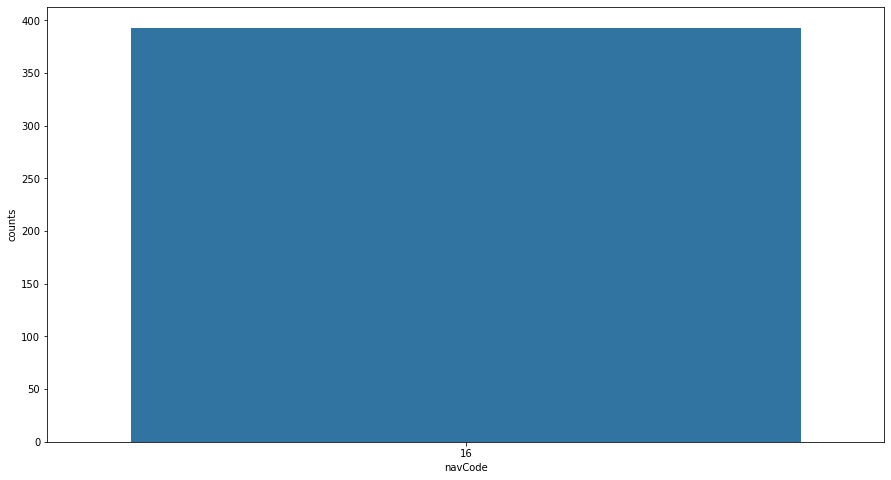

In [77]:
dd=df_413970021["navCode"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navCode","navCode":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navCode","counts",data=dd)

/Users/varun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='navDesc', ylabel='counts'>

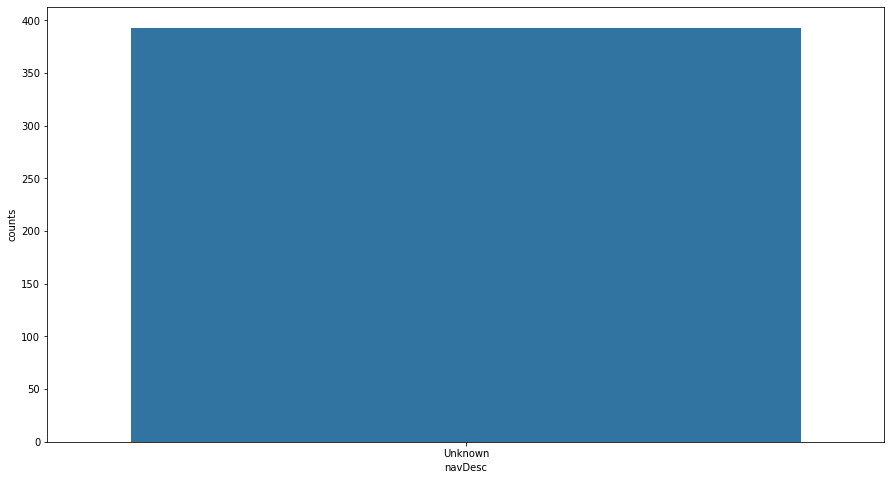

In [78]:
dd=df_413970021["navDesc"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navDesc","navDesc":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navDesc","counts",data=dd)

### 8.b.   Provide the final state for each series of contiguous events with the same Navigation Code; series may be interrupted by other series, but each contiguous series must be its own record.

In [79]:
df_413970021['city']=np.nan
for i in range (0,len(df_413970021['latitude'])):
    try:
        location=geolocator.reverse(str(df['latitude'][i])+","+str(df_413970021['longitude'][i]))
        ddf_413970021['city'].iloc[i]=pinyin.get(location.raw.get('address').get('city'))
    except:
        pass

<ipython-input-79-b1d489174aa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_413970021['city']=np.nan


In [80]:
df_413970021.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index().merge(df_413970021[["epochMillis","mmsi","navCode","navDesc","latitude","longitude","city"]],on=["mmsi","navCode",'epochMillis'],how="inner")





,mmsi,navCode,epochMillis,navDesc,latitude,longitude,city
0,413970021,16,2019-03-29 20:16:09,Unknown,31.683237,121.19696,NaN


### 8.c.   Final report should include at least the following fields/columns:
### i.   mmsi = the MMSI of the vessel
### ii.   timestamp = the timestamp of the last event in that contiguous series
### iii.   Navigation Code = the navigation code (i.e., navigation.navCode)
### iv.   Navigation Description = the navigation code description (i.e., navigation.navDesc)
### v.   lead time (in Milliseconds) = the time difference in milliseconds between the last and first timestamp of that particular series of the same contiguous navigation codes



In [81]:
dff=df_413970021.groupby(["mmsi","navCode","navDesc"])["epochMillis"].max().reset_index().rename(columns={"epochMillis":"last_event"})
dff["lead_time_in_ms"]=np.nan

In [82]:
dff["lead_time_in_ms"]=df_413970021.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index()[["epochMillis"]]-df_413970021.groupby(["mmsi","navCode"])["epochMillis"].min().reset_index()[["epochMillis"]]




In [83]:
dff

,mmsi,navCode,navDesc,last_event,lead_time_in_ms
0,413970021,16,Unknown,2019-03-29 20:16:09,6 days 20:26:15


## 8 a.   Do you agree with the Navigation Code(s) and Description(s) for this particular vessel?   
#### ii.   If you do not agree, provide an explanation why do disagree. Additionally, if you do not agree, what would you change it to and why?
#### answer  :  i dont agree becuase vessel should have the nav code and nav desc in order to keep the track of status of the vessel, weather it was Under Way Using Engine,At Anchor or Moored


# ML modelling

In [184]:


df_m["dwell_time"]=df.groupby(["mmsi","navDesc"])["epochMillis"].max().reset_index()["epochMillis"]-df.groupby(["mmsi","navDesc"])["epochMillis"].min().reset_index()["epochMillis"]



df_m=df_m[(df_m["navDesc"]=='At Anchor') ^ (df_m["navDesc"]=='Moored')]

df_m.groupby(["mmsi"])["dwell_time"].mean()



DataError: No numeric types to aggregate

In [186]:
df_m["dwell_time"]=pd.to_datetime(df_m["dwell_time"])

TypeError: dtype timedelta64[ns] cannot be converted to datetime64[ns]

In [198]:
df_m["dwell_time"].dt.second

AttributeError: 'TimedeltaProperties' object has no attribute 'second'

In [187]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7383 entries, 14 to 34323
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   mmsi         7383 non-null   int64          
 1   navDesc      7383 non-null   object         
 2   epochMillis  7383 non-null   datetime64[ns] 
 3   dwell_time   7383 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(1), timedelta64[ns](1)
memory usage: 288.4+ KB


,mmsi,navDesc,epochMillis,dwell_time
14,201804190,Moored,2019-03-29 03:56:05,3 days 22:02:38
19,205717000,At Anchor,2019-03-27 04:31:31,0 days 03:18:00
21,205717000,Moored,2019-03-29 23:43:24,2 days 14:21:47
23,205791000,At Anchor,2020-03-22 18:09:35,1 days 15:09:04
24,205791000,Moored,2020-03-23 16:22:20,0 days 13:58:22
...,...,...,...,...
34315,671759000,Moored,2019-03-28 08:33:29,5 days 08:07:28
34318,671815000,At Anchor,2019-03-26 00:11:06,0 days 03:06:00
34320,671883000,At Anchor,2019-03-23 08:07:22,0 days 08:21:01
34322,671885000,At Anchor,2020-03-26 11:50:46,0 days 07:42:01


In [180]:
df_m["navDesc"].unique()

array(['Under Way Using Engine', 'Unknown', 'Moored', 'At Anchor',
       'Constrained By Her Draught', 'Restricted Manoeuvrability',
       'Not Under Command', 'Underway Sailing', 'Not Defined', 'Aground',
       'Engaged In Fishing', 'Reserved For Future Use',
       'Reserved For Future Amendment'], dtype=object)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473877 entries, 0 to 3473876
Data columns (total 28 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   epochMillis       datetime64[ns]
 2   mmsi              int64         
 3   olson_timezone    object        
 4   imo               float64       
 5   callSign          object        
 6   destination       object        
 7   cargoDetails      object        
 8   latitude          float64       
 9   longitude         float64       
 10  navCode           int64         
 11  navDesc           object        
 12  courseOverGround  float64       
 13  heading           float64       
 14  rateOfTurn        float64       
 15  speedOverGround   float64       
 16  vessel_name       object        
 17  typeName          object        
 18  typeCode          int64         
 19  draught           float64       
 20  length            float64       
 21  width   